In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
import datetime
now = datetime.datetime.now()
print (now)
now.strftime("%Y-%m-%d %H:%M")

2018-08-30 03:22:47.543692


'2018-08-30 03:22'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    coordinates = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = coordinates.city_name
    #print (city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    #print (coordinates.country_code)

# Print the city count to confirm sufficient count
len(cities)

617

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#print (url)

cityError = "City not found!"
temperatures = []
humidities = []
cloudinesses = []
windSpeeds = []
latitudes = []
longitudes = []
countries = []

i = -1 #since we want the index to start at 0 when iterating through the lat_lngs list
j = 0
for city in cities[:]: #https://stackoverflow.com/questions/7210578/why-does-list-remove-not-behave-as-one-might-expect
    i = i + 1
    if j < 500:
        cityURL = url + "&q=" + city
        #print (cityURL)
        cityWeatherResponse = requests.get(cityURL).json()
        #print(json.dumps(cityWeatherResponse, indent=4, sort_keys=True))
        #print (cityWeatherResponse)
        try:
            cityTemperature = cityWeatherResponse['main']['temp']
            cityHumidity = cityWeatherResponse['main']['humidity']
            #cityCloudiness = cityWeatherResponse['weather'][0]['description']
            cityCloudiness = cityWeatherResponse['clouds']['all']
            cityWindSpeed = cityWeatherResponse['wind']['speed']
            #print(f"City: {city}")
            #print(f"Temperature: {cityTemperature}")
            #print(f"Humidity: {cityHumidity}")
            #print(f"Cloudiness: {cityCloudiness}")
            #print(f"Wind speed: {cityWindSpeed}")
            #print("##################")
            temperatures.append(cityTemperature)
            humidities.append(cityHumidity)
            cloudinesses.append(cityCloudiness)
            windSpeeds.append(cityWindSpeed)

            latitude = lats[i]
            latitudes.append(latitude)
            longitude = lngs[i]
            longitudes.append(longitude)
            #cities.append(city)
            #print(latitudes)
            countries.append(citipy.nearest_city(latitude, longitude).country_code)
            j = j + 1
        except:
            #print(cityError)
            cities.remove(city)
    elif j == 500:
        cities.remove(city) #to remove the city from the list if we already have 500 cities; if we don't do this, we stop
    #collecting parameters after 500 cities but the cities past the 500 index remain in the "cities" list

print(len(temperatures))
print(len(humidities))
print(len(cloudinesses))
print(len(windSpeeds))
print(len(latitudes))
print(len(longitudes))
print(len(countries))
print(len(cities))

500
500
500
500
500
500
500
500


In [5]:
numberTemperatures = len(temperatures)
numberHumidities = len(humidities)
numberCloudinesses =  len(cloudinesses)
numberWindSpeeds = len(windSpeeds)
#print(cities)
#print(cloudinesses)
#countList = []
#countDF = pd.DataFrame({"Temperature":numberTemperatures, "Humidity":numberHumidities, "Cloudiness":numberCloudinesses, "Wind Speed":numberWindSpeeds}, index=[0])
'''
countDF = pd.DataFrame([{"Temperature":numberTemperatures},
                        {"Humidity":numberHumidities},
                        {"Cloudiness":numberCloudinesses},
                        {"Wind Speed":numberWindSpeeds}
                       ])
'''
#countDF = pd.DataFrame({["Temperature", "Humidity", "Cloudiness", "Wind Speed"]:
#                        [numberTemperatures, numberHumidities, numberCloudinesses, numberWindSpeeds]})
#print (countDF)
numberWindSpeeds
df = pd.DataFrame({"City":cities, "Cloudiness":cloudinesses, "Country":countries,
                   "Date":now, "Humidity":humidities, "Lat":latitudes,
                   "Lng":longitudes, "Max Temp":temperatures, "Wind Speed":windSpeeds
})
df = df.reset_index(drop = True)
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tiksi,12,ru,2018-08-30 03:22:47.543692,68,89.455249,122.718482,62.03,17.83
1,albany,75,au,2018-08-30 03:22:47.543692,81,-70.425193,106.794197,72.25,5.82
2,new norfolk,0,au,2018-08-30 03:22:47.543692,66,-53.219716,136.991137,50.00,12.75
3,rikitea,100,pf,2018-08-30 03:22:47.543692,100,-59.590895,-131.586790,71.57,13.24
4,port alfred,24,za,2018-08-30 03:22:47.543692,82,-86.646292,55.942005,70.04,6.53
5,georgetown,20,mg,2018-08-30 03:22:47.543692,100,-61.399588,62.809791,71.60,4.07
6,severo-kurilsk,0,sh,2018-08-30 03:22:47.543692,94,-4.164192,-23.864416,50.42,4.07
7,hilo,90,br,2018-08-30 03:22:47.543692,71,10.384928,-39.533108,63.48,5.82
8,punta arenas,40,us,2018-08-30 03:22:47.543692,74,10.774147,-153.334659,37.40,16.11
9,arlit,0,cl,2018-08-30 03:22:47.543692,48,-56.247302,-81.469933,88.04,9.22


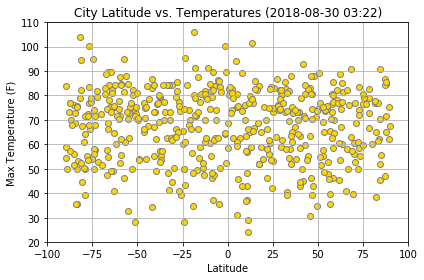

In [6]:
temperatureLatitudePlot = plt.scatter(latitudes, temperatures, color="Gold", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Temperatures ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Max Temperature (F)")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVStemperature.png")
plt.tight_layout()
#################################################################################################################

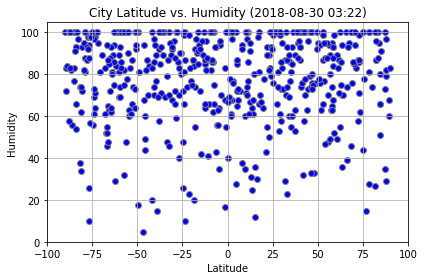

In [7]:
humidityLatitudePlot = plt.scatter(latitudes, humidities, color="Blue", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Humidity ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Humidity")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVShumidity.png")
plt.tight_layout()
#################################################################################################################

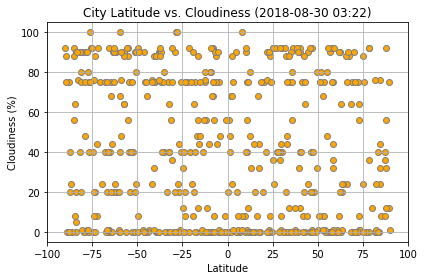

In [8]:
cloudinessLatitudePlot = plt.scatter(latitudes, cloudinesses, color="Orange", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Cloudiness ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Cloudiness (%)")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVScloudiness.png")
plt.tight_layout()
#################################################################################################################

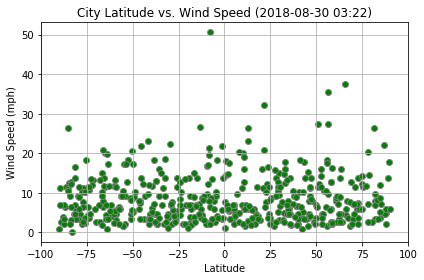

In [9]:
windSpeedLatitudePlot = plt.scatter(latitudes, windSpeeds, color="Green", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Wind Speed ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Wind Speed (mph)")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVSwindspeeds.png")
plt.tight_layout()
#################################################################################################################